# UNSUPERVISED LEARNING ALGORITHMS

# K-MEANS

In [26]:
# This dataset was retrieved from UCI Repository we will use it for customer segmentation
df <- read.csv("online_retail.csv")

dim(df)


[1] 944045      8

In [27]:
# change column names
colnames(df)[1] <- "InvoiceNo"

# drop cancelled orders
df <- df[df$Quantity > 0,]

# drop records without customer id
df = df[!is.na(df$Customer.ID),]

In [28]:
#Calculate total sales from the quantity and unit price
df$Sales = df$Quantity * df$Price


In [29]:
# Aggregate sales by customer Id
cust_df <- aggregate(df$Sales,by=list(df$Customer.ID),FUN=sum)
colnames(cust_df)[1] <- "Customer.ID"
colnames(cust_df)[2] <- "Total Sales"
head(cust_df)

Customer.ID,Total Sales
12346,77556.46
12347,4114.18
12348,2019.40
12349,2671.14
12350,334.40
12351,300.93


In [30]:
# count of sales per customer
t <- data.frame(table(df$Customer.ID)) # count of sales per customer
colnames(t)[1] <- "Customer.ID"
df <- merge(cust_df,t, by =("Customer.ID"), all.x =TRUE)
colnames(df)[3] <- "OrderCount"
head(df)

Customer.ID,Total Sales,OrderCount
12346,77556.46,34
12347,4114.18,195
12348,2019.40,51
12349,2671.14,102
12350,334.40,17
12351,300.93,21


In [31]:
# AVERAGE SALES BY ORDER
df$AveOrderValue <- df$`Total Sales`/df$OrderCount
dim(df)
df1 <- df
head(df1)

[1] 5622    4

Customer.ID,Total Sales,OrderCount,AveOrderValue
12346,77556.46,34,2281.07235
12347,4114.18,195,21.09836
12348,2019.40,51,39.59608
12349,2671.14,102,26.18765
12350,334.40,17,19.67059
12351,300.93,21,14.33000


In [40]:
# SCALE THE DATA 
# SCALE THE DATA 
df1$`Total Sales` <- scale(df1$`Total Sales`)
df1$OrderCount <- scale(df1$OrderCount)
df1$AveOrderValue <- scale(df1$AveOrderValue)
df2 <- df1[,c(2,3)]

head(df2)

,OrderCount,AveOrderValue
12346,-0.29587521,8.288192776
12347,0.21705109,-0.064264384
12348,-0.24171529,0.004099859
12349,-0.07923553,-0.045455291
12350,-0.35003513,-0.069541167
12351,-0.33729162,-0.089279020


In [41]:
# Create the k-means model: km.out
km.out <- kmeans(df2, centers = 3, nstart = 20,iter.max = 50)

# Inspect the result
summary(km.out)

             Length Class  Mode   
cluster      5622   -none- numeric
centers         6   -none- numeric
totss           1   -none- numeric
withinss        3   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            3   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

12346 12347 12348 12349 12350 12351 
    3     3     3     3     3     3

OrderCount,AveOrderValue
-0.39782329,38.31544063
14.36234768,-0.02841445
-0.03309259,-0.02043827


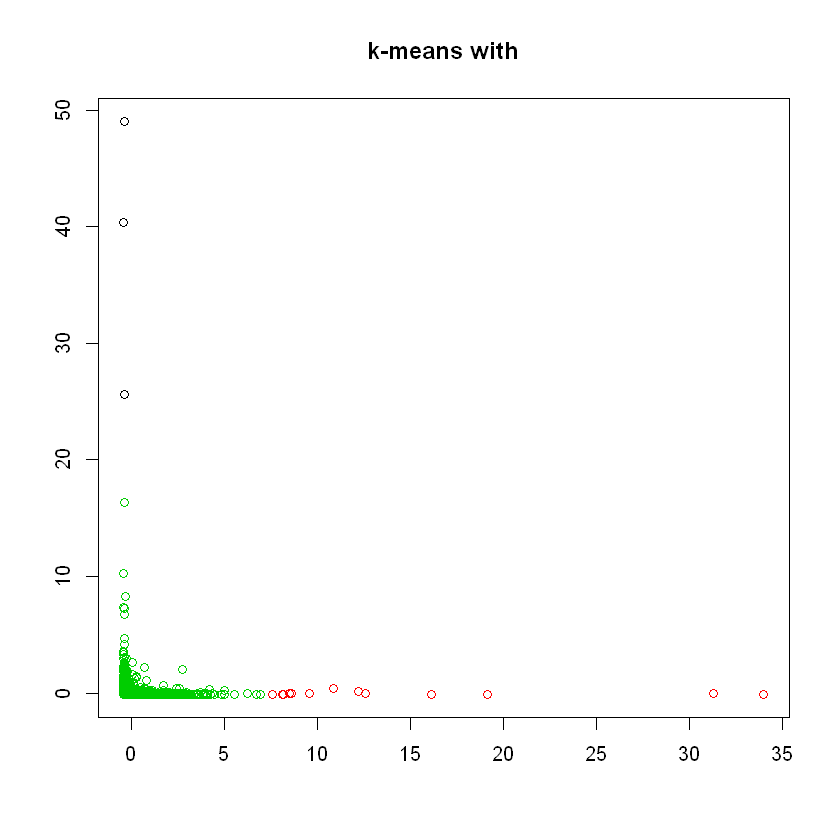

In [44]:
# Print the cluster membership component of the model
head(km.out$cluster)
head(km.out)

# Scatter plot of x
plot(df2, col = km.out$cluster,
     main = "k-means with", 
     xlab = "", ylab = "")

In [45]:
# not scaled plot to see how much each customer would pay
k <- 2
df3 <- df[c(2,3)]

# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(df3, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning mess

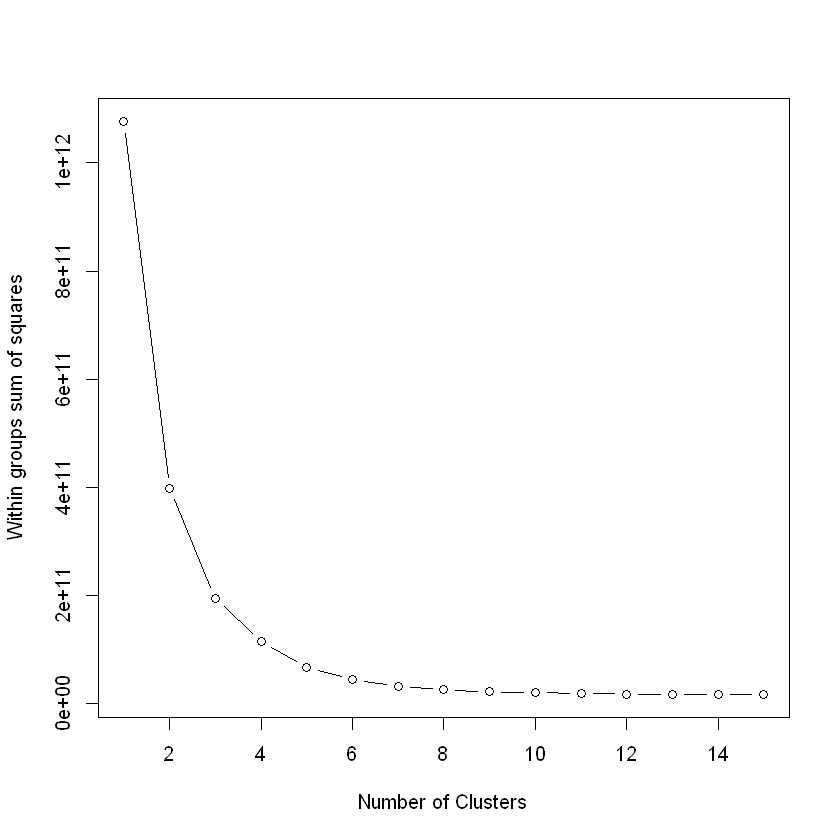

In [46]:
# Plot total within sum of squares vs. number of clusters
# from this we can see to use 2 clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



In [48]:
# Create the k-means model: km.out
km.out <- kmeans(df3, centers = k, nstart = 20,iter.max = 50)
# Inspect the result
summary(km.out)
# Print the cluster membership component of the model
head(km.out$cluster)
# Print the km.out object
head(km.out)




             Length Class  Mode   
cluster      5622   -none- numeric
centers         4   -none- numeric
totss           1   -none- numeric
withinss        2   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            2   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

[1] 1 1 1 1 1 1

Total Sales,OrderCount
2462.134,123.4058
339084.542,3370.1667


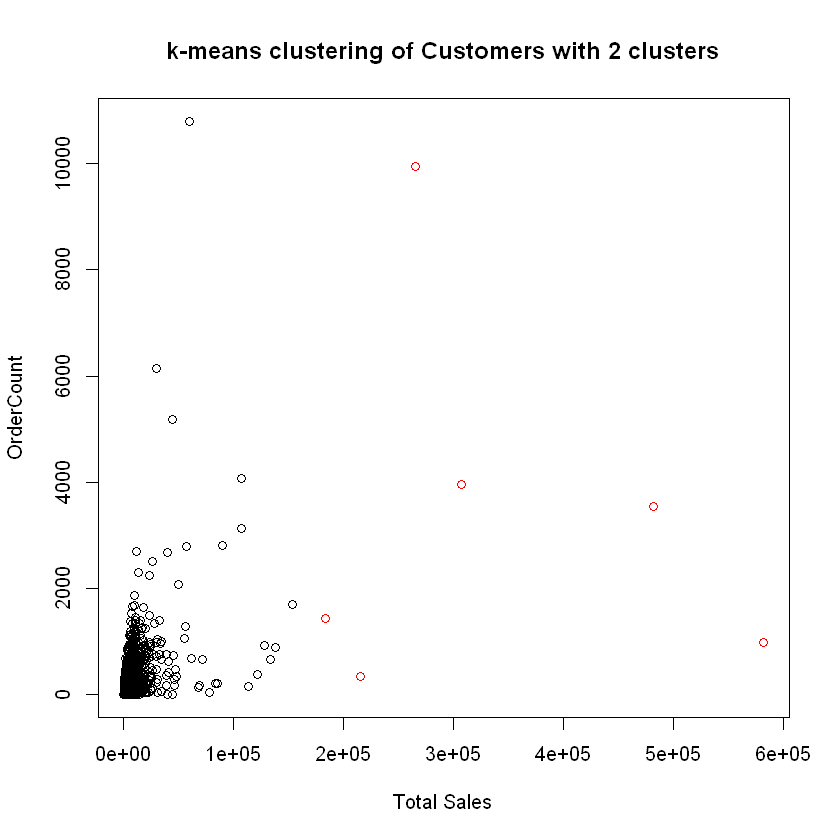

In [49]:
# Plot of Customers vs.Total Sales by OrderCount membership
# maybe do log for x scale 
plot(df3[, c("Total Sales", "OrderCount")],
     col = km.out$cluster,
     main = paste("k-means clustering of Customers with", k, "clusters"),
     xlab = "Total Sales", ylab = "OrderCount")

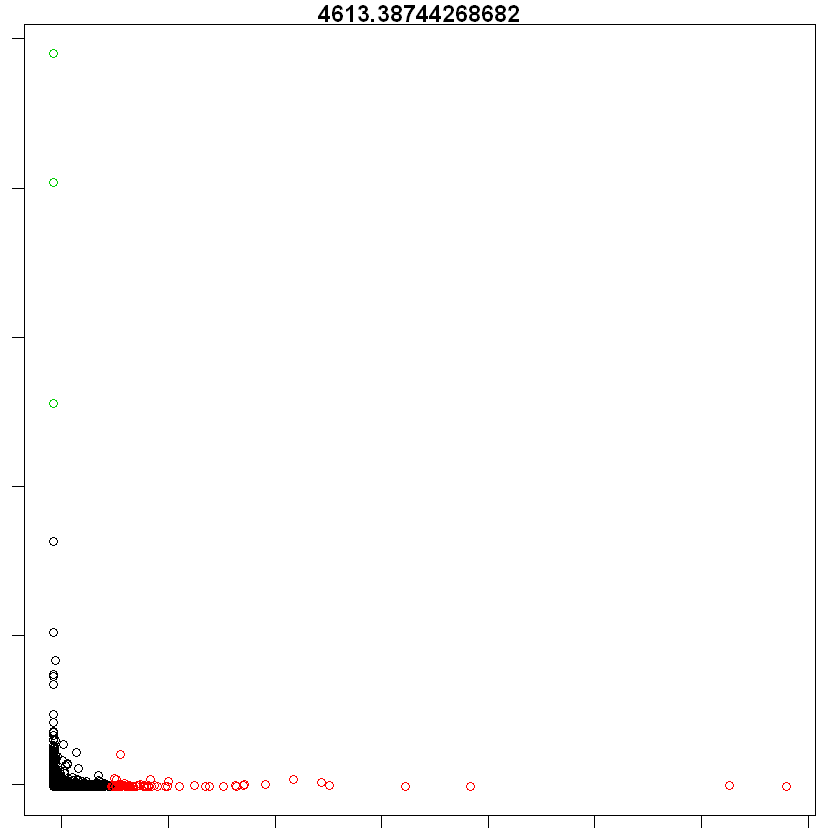

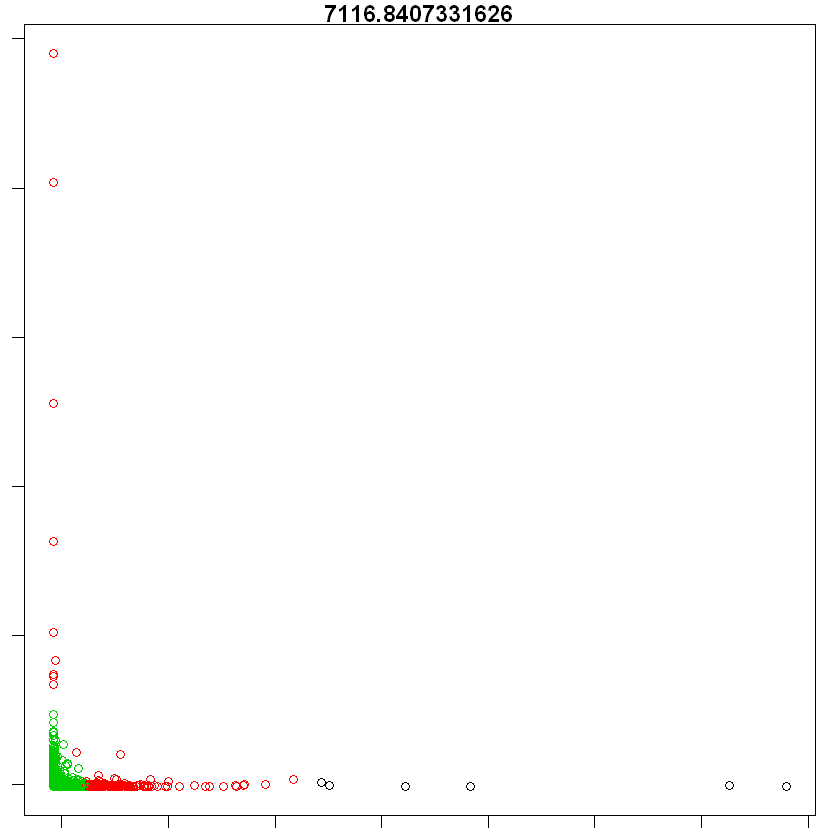

In [50]:
# algorithm loop to plot
# Set up 2 x 3 plotting grid
par(mar=c(1,1,1,1))

# Set seed
set.seed(1)

for(i in 1:2) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(df2, centers = 3, nstart = 1)
  
  # Plot clusters
  plot(df2, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}


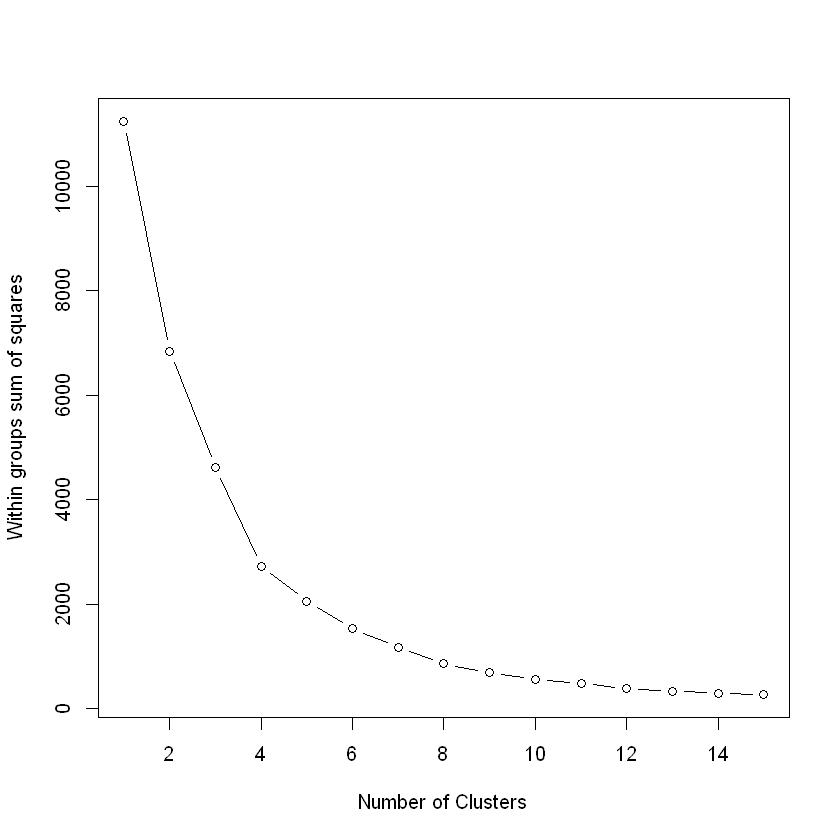

In [51]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(df2, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")


In [52]:
# Conclusion this is just a way of exploring k-means the resulting graphs of clusters
# was not favorable but it got the purpose across we would segment into 2 different sections
# the resulting purpose was to familiarize myself with the terms and what makes a model better than another


# Hierarcial Clustering !

In [53]:
# HIERARCIAL CLUSTERING USING DIFFERENT DATASET!!!!!!!!!!!!!!!!!!!!!!
# number of clusters isnt known ahead of time
# two types bottom up and top down and we will do bottom up!
hdf <- read.csv("USArrests.csv")
dim(hdf)


[1] 50  5

In [54]:
# no missing values
# Scale the data
hdf1 <- scale(hdf[c(2:5)]) # scale only numeric columns
hdf2 <- cbind(hdf,hdf1)# bind dataframe onto first df
hdf2 <- hdf2[-c(2:5)] # remove non scaled columns
hdf3 <- hdf2[c(2,3)] #just pick two columns to cluster


In [55]:
# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(hdf3))

# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       98     -none- numeric  
height      49     -none- numeric  
order       50     -none- numeric  
labels       0     -none- NULL     
method       1     -none- character
call         2     -none- call     
dist.method  1     -none- character

In [56]:
# Different linkage methods
# complete, single, average and centroid
# Cluster using complete linkage: hclust.complete
hclust.complete <- hclust(dist(hdf3), method = "complete")

# Cluster using average linkage: hclust.average
hclust.average <- hclust(dist(hdf3), method = "average")

# Cluster using single linkage: hclust.single
hclust.single <- hclust(dist(hdf3), method = "single")


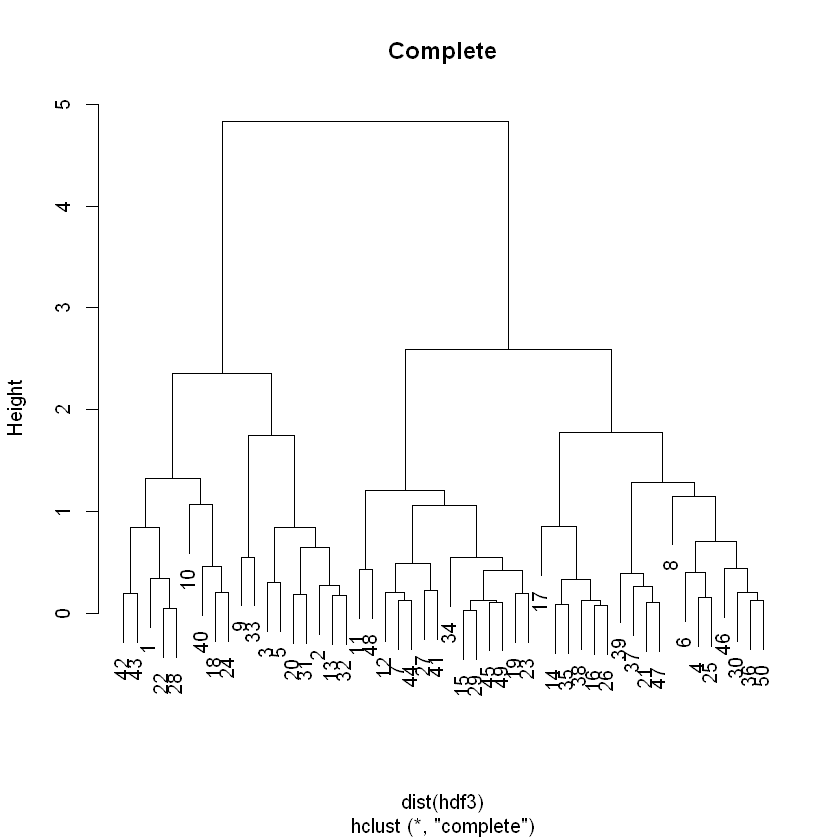

In [57]:
# Plot dendrogram of hclust.complete
plot(hclust.complete, main = "Complete")


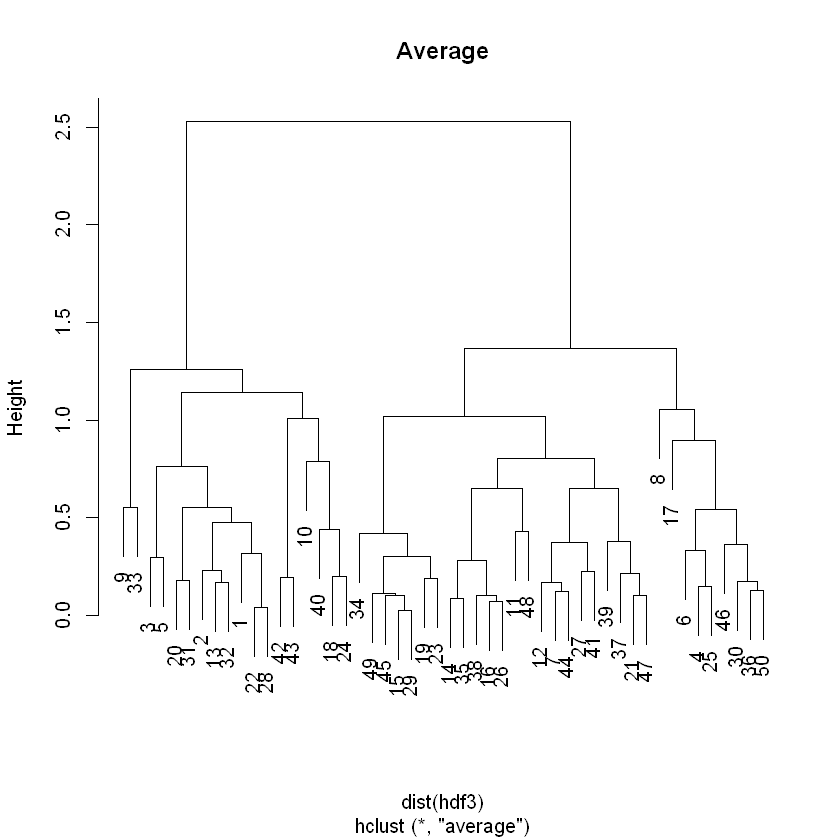

In [58]:
# Plot dendrogram of hclust.average
plot(hclust.average, main = "Average")


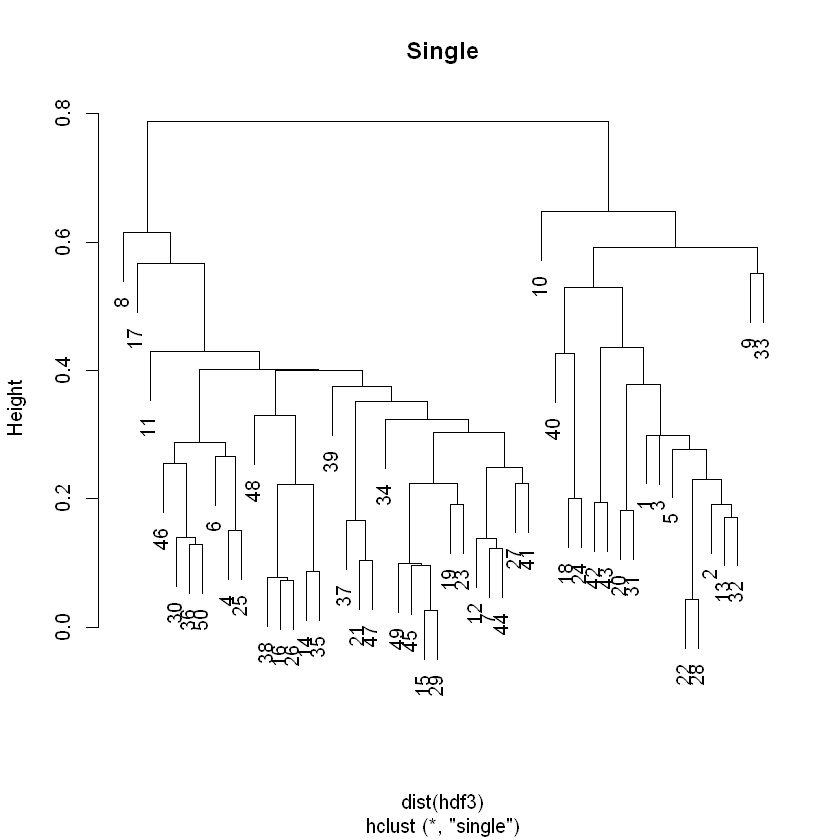

In [59]:
# Plot dendrogram of hclust.single
plot(hclust.single, main = "Single")


In [60]:
# Compare methods
# Cluster using complete linkage: hclust.complete
hclust.complete <- hclust(dist(hdf3), method = "complete")
km.arrest <- kmeans(hdf3, centers = 3, nstart = 20, iter.max = 50)


In [61]:
# Apply cutree() to hclust.
cut.complete <- cutree(hclust.complete, k = 3)

# Compare methods
table(km.arrest$cluster, cut.complete)

   cut.complete
     1  2  3
  1  0 18  0
  2  0  0 14
  3 18  0  0

In [62]:
# looking at the table it looks like the the hierarcial cluster assigns most of
#observations to 1 cluster and kmeans algorithm distributes the obeserations relatively evenly amon all clusters
# to find out which clusteer is best you need business understanding


# DIMENSIONALITY REDUCTION (PCA)

In [63]:
# DIMENSIONALITY REDUCTION WITH PCA
# the goals of pca 
# find linear combinations of variables to create principal components
# maintain most variance in the data
# principal components are uncorrelated (orthogonal)
install.packages("factoextra")
library(factoextra)

# read in dataset
pca_df <- read.csv("decathlon.csv")

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpkNwJDw\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [64]:
rownames(pca_df) <- pca_df[,1] # make the first column row names!
pca_df <- pca_df[-c(1)]
pca_df1 <- pca_df[1:23,1:7]

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6
Standard deviation     1.7301 1.0955 0.76821 0.69889 0.65064 0.55203
Proportion of Variance 0.4989 0.2000 0.09836 0.08141 0.07056 0.05079
Cumulative Proportion  0.4989 0.6989 0.79725 0.87866 0.94921 1.00000

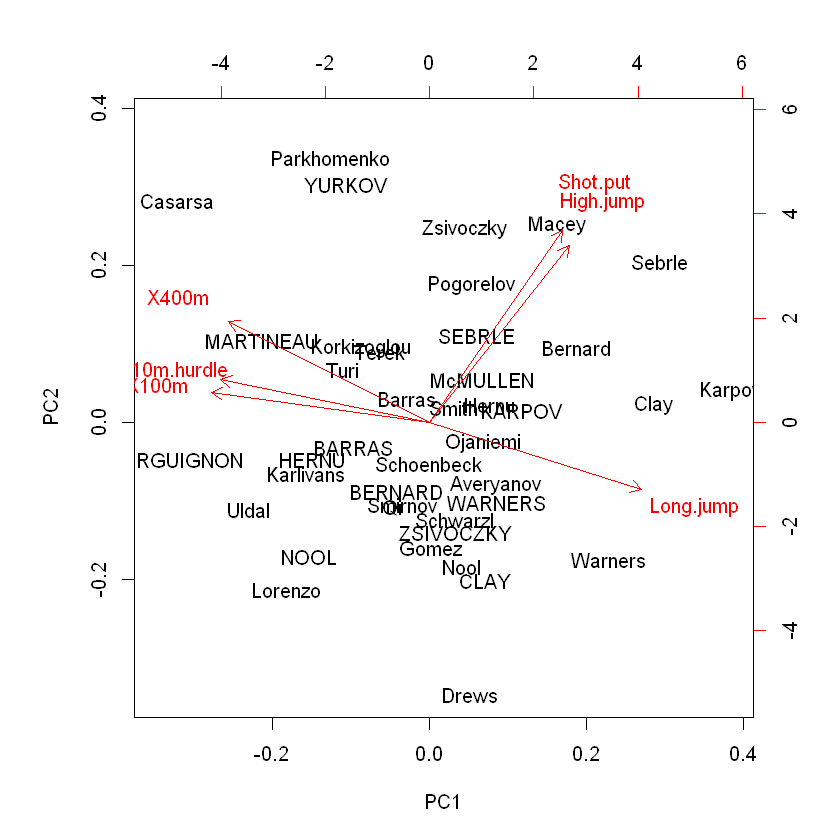

In [65]:
#Compute PCA
res.pca <- prcomp(pca_df[c(1:6)], scale = TRUE)
summary(res.pca)# to get 75% of cumulative variance keep top 3 principle components
biplot(res.pca)


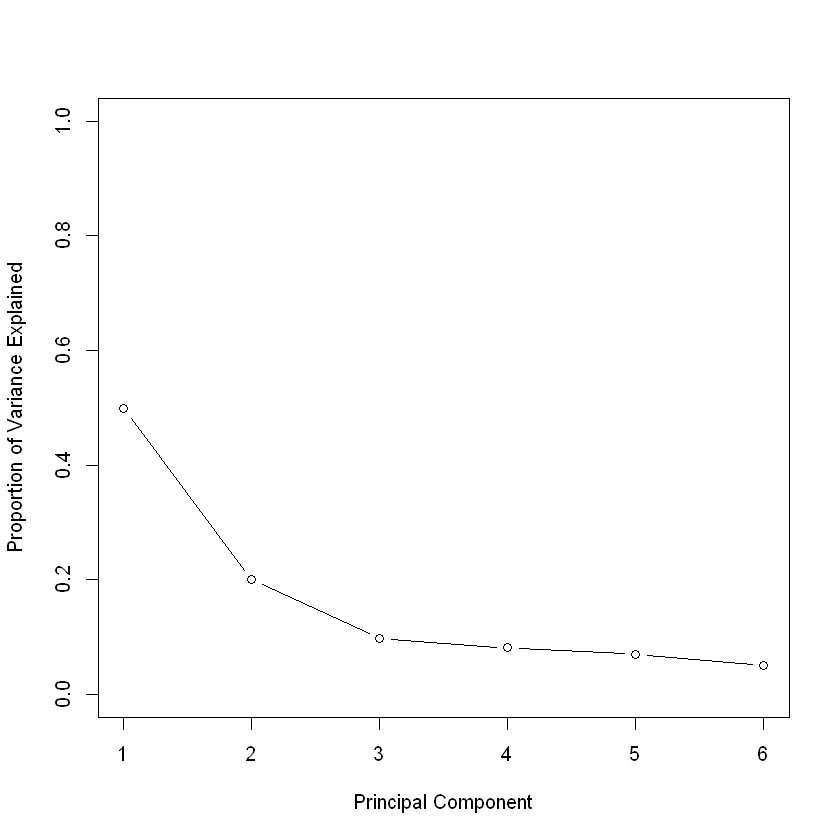

In [66]:
# Variability of each principal component: pr.var
pr.var <- res.pca$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")


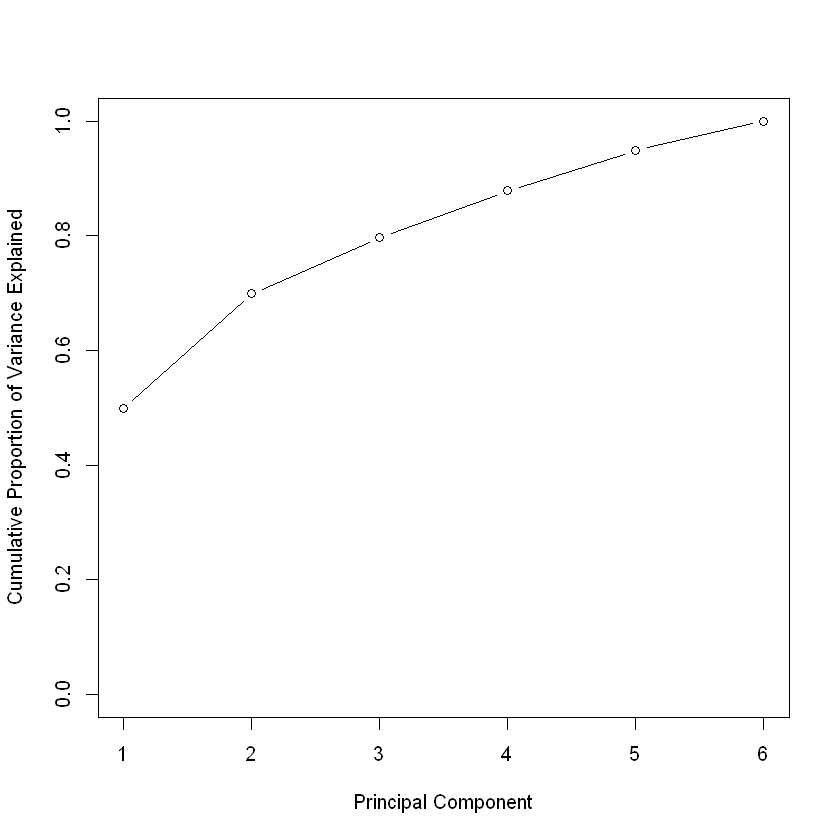

In [67]:
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")


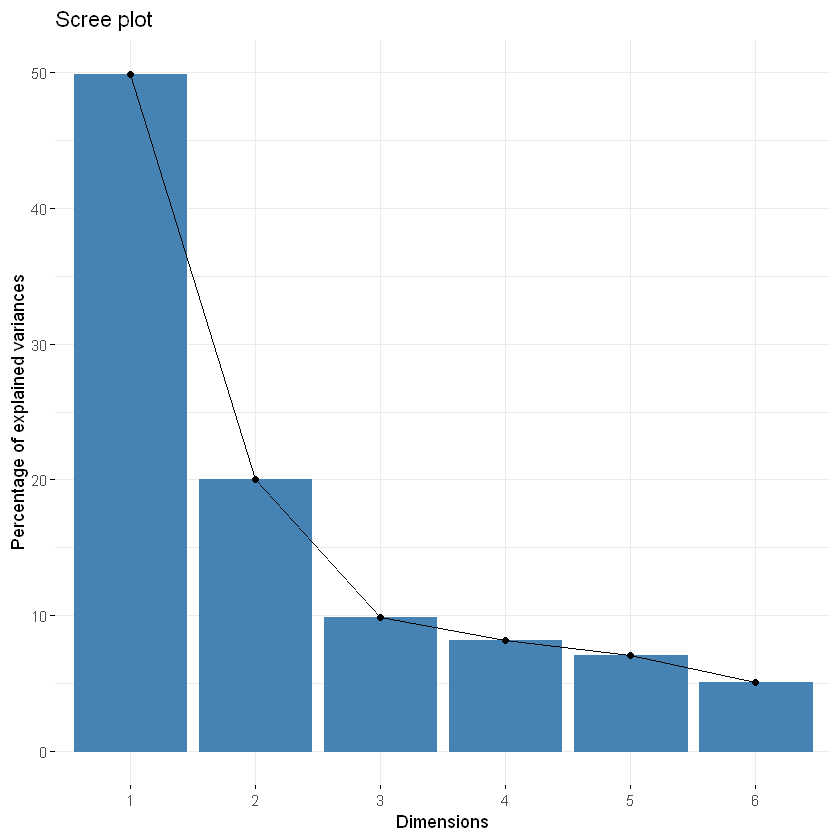

In [68]:
#Visualize eigenvalues (scree plot). Show the percentage of variances explained by each principal component
fviz_eig(res.pca)


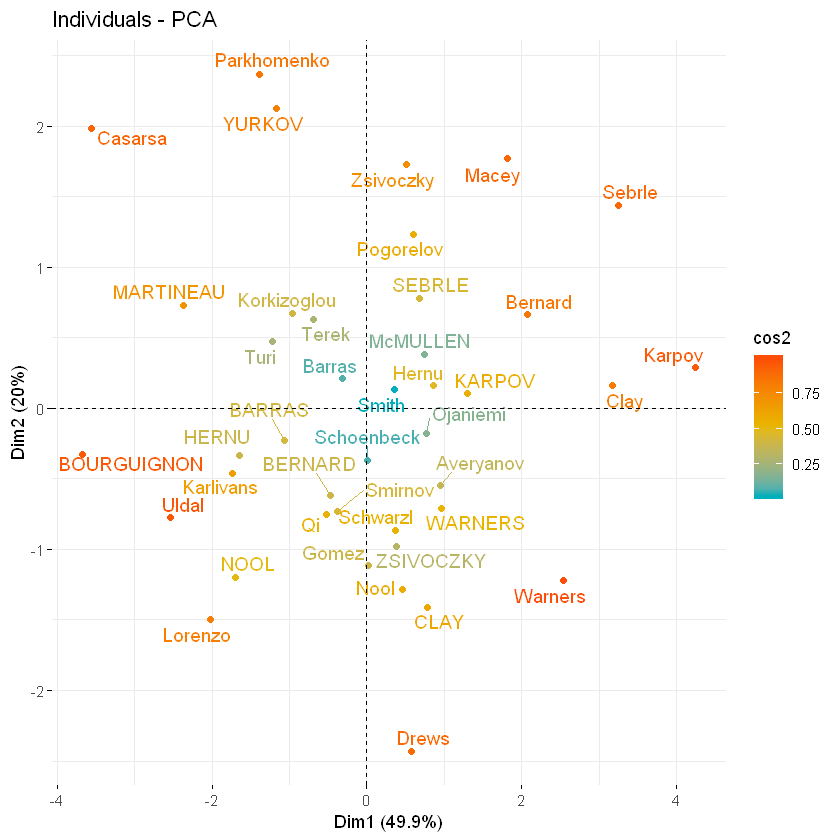

In [69]:
# checking to see if people have been grouped together
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

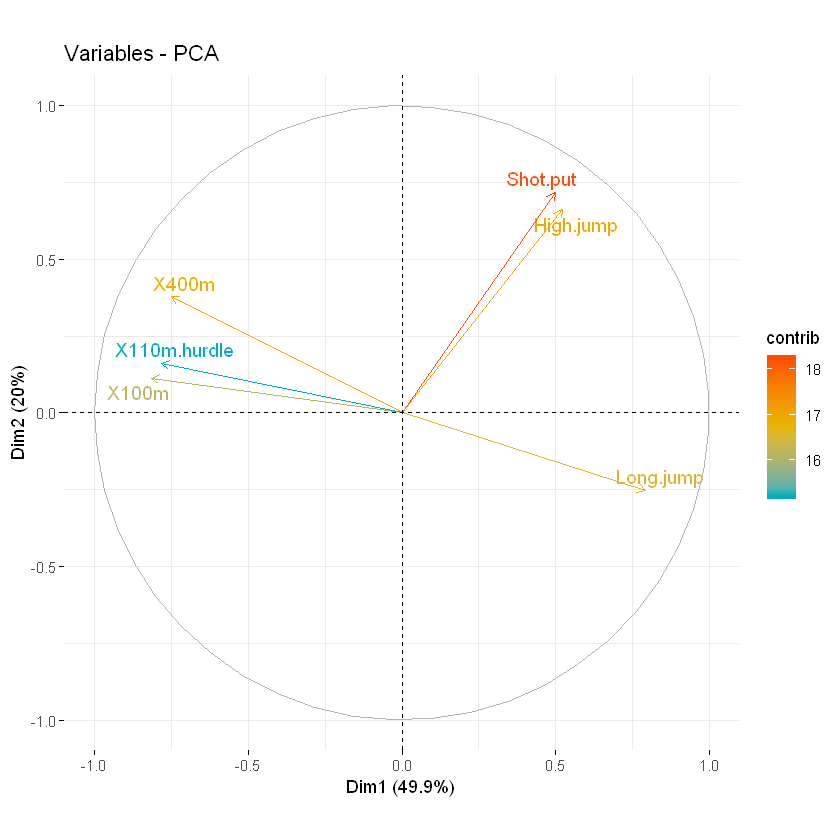

In [70]:
#Graph of variables. Positive correlated variables point to the same side of the plot. Negative correlated variables point to opposite sides of the graph
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)


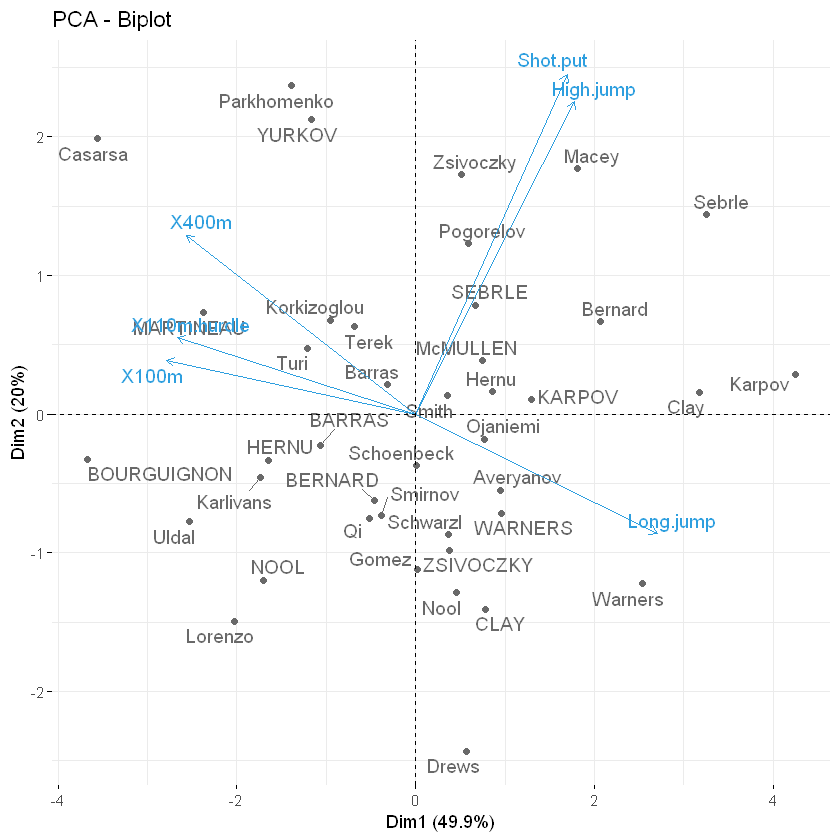

In [71]:
#Biplot of individuals and variables
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
)

In [72]:
# Getting the results
library(factoextra)
# Eigenvalues
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.9931293,49.885489,49.88549
Dim.2,1.2002059,20.003432,69.88892
Dim.3,0.5901468,9.835781,79.72470
Dim.4,0.4884485,8.140809,87.86551
Dim.5,0.4233355,7.055591,94.92110
Dim.6,0.3047339,5.078899,100.00000


In [73]:
# Results for Variables
res.var <- get_pca_var(res.pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 
# Results for individuals
res.ind <- get_pca_ind(res.pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
X100m,-0.8157935,0.1132161,-0.3492235,0.164004342,0.2593356,0.3248902
Long.jump,0.7934968,-0.2526152,-0.2289185,-0.359520036,-0.1706853,0.3094456
Shot.put,0.4980800,0.7188225,0.3686337,-0.118424030,0.2384609,0.1686175
High.jump,0.5224222,0.6615243,-0.4913372,0.094402446,-0.1120622,-0.1630295
X400m,-0.7516052,0.3783093,0.1593033,0.008448142,-0.4955170,0.1448643
X110m.hurdle,-0.7823389,0.1616647,-0.1144790,-0.556137572,0.1094915,-0.1656126


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
X100m,22.23489,1.067973,20.665546,5.50670601,15.886914,34.637969
Long.jump,21.03608,5.316956,8.879772,26.46228825,6.881891,31.423009
Shot.put,8.28844,43.051423,23.026613,2.87118297,13.432275,9.330065
High.jump,9.11838,36.461614,40.907149,1.82451608,2.966426,8.721914
X400m,18.87357,11.924450,4.300210,0.01461179,58.000606,6.886553
X110m.hurdle,20.44864,2.177583,2.220709,63.32069489,2.831887,9.000489


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
X100m,0.6655190,0.01281788,0.12195707,0.0268974242,0.06725494,0.10555365
Long.jump,0.6296372,0.06381443,0.05240369,0.1292546561,0.02913349,0.09575658
Shot.put,0.2480837,0.51670573,0.13589083,0.0140242508,0.05686358,0.02843188
High.jump,0.2729249,0.43761445,0.24141224,0.0089118219,0.01255794,0.02657863
X400m,0.5649103,0.14311796,0.02537756,0.0000713711,0.24553713,0.02098566
X110m.hurdle,0.6120542,0.02613548,0.01310545,0.3092889989,0.01198838,0.02742754


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
SEBRLE,0.67460380,0.7809380,-0.830156650,-0.553787609,-0.32310638,0.47277791
CLAY,0.78285430,-1.4090172,1.124559641,0.362156457,-0.38271712,0.32026077
KARPOV,1.29923294,0.1069588,-0.420464153,0.847275979,0.64691905,0.06325141
BERNARD,-0.46475211,-0.6213362,0.022040644,-0.626380607,0.65741695,-0.29990834
YURKOV,-1.16997560,2.1226184,-0.979513430,-0.557242923,0.45811596,0.05423785
WARNERS,0.95749133,-0.7131208,-0.683367828,0.210373179,0.29150792,0.80642061
ZSIVOCZKY,0.37886867,-0.9802777,-1.126042439,1.032682823,0.16169878,-0.06294868
McMULLEN,0.74919640,0.3839000,-1.151239797,0.532768781,-1.18592528,-0.85123838
MARTINEAU,-2.36973063,0.7301609,-0.446938694,0.703284675,1.20903899,0.67569602
HERNU,-1.64607577,-0.3327369,-0.001108913,-1.069963060,-0.30630086,1.77558066


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
SEBRLE,3.708414e-01,1.23934855,2.848237e+00,1.531383e+00,0.60148188,1.788997231
CLAY,4.994046e-01,4.03452999,5.226621e+00,6.549223e-01,0.84389277,0.820923699
KARPOV,1.375513e+00,0.02324841,7.306578e-01,3.584653e+00,2.41118966,0.032021057
BERNARD,1.760084e-01,0.78453740,2.007727e-03,1.959178e+00,2.49007991,0.719900351
YURKOV,1.115435e+00,9.15596710,3.965307e+00,1.550552e+00,1.20915601,0.023545086
WARNERS,7.470684e-01,1.03344314,1.930035e+00,2.209928e-01,0.48958964,5.204973785
ZSIVOCZKY,1.169683e-01,1.95280372,5.240414e+00,5.325143e+00,0.15064161,0.031715283
McMULLEN,4.573851e-01,0.29949981,5.477566e+00,1.417343e+00,8.10300573,5.799595413
MARTINEAU,4.576027e+00,1.08342154,8.255663e-01,2.469788e+00,8.42193924,3.654248086
HERNU,2.207955e+00,0.22498960,5.082194e-06,5.716562e+00,0.54054011,25.233420289


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
SEBRLE,1.905170e-01,0.255310875,2.885070e-01,1.283875e-01,0.0437046140,0.0935730080
CLAY,1.444397e-01,0.467904647,2.980504e-01,3.091130e-02,0.0345207772,0.0241730959
KARPOV,5.595691e-01,0.003792387,5.860540e-02,2.379740e-01,0.1387329254,0.0013262336
BERNARD,1.423795e-01,0.254482576,3.202236e-04,2.586315e-01,0.2848961457,0.0592900558
YURKOV,1.860566e-01,0.612400332,1.304104e-01,4.220663e-02,0.0285261012,0.0003998495
WARNERS,3.431265e-01,0.190331560,1.747808e-01,1.656400e-02,0.0318042625,0.2433928637
ZSIVOCZKY,4.137834e-02,0.277009007,3.655150e-01,3.074182e-01,0.0075371844,0.0011422705
McMULLEN,1.261651e-01,0.033127141,2.979061e-01,6.380068e-02,0.3161276153,0.1628734036
MARTINEAU,6.409459e-01,0.060849989,2.279919e-02,5.645283e-02,0.1668414773,0.0521106075
HERNU,3.757228e-01,0.015352175,1.705152e-07,1.587470e-01,0.0130096105,0.4371683149


In [74]:
# Predicting using PCA
ind.sup <- pca_df[24:27, 1:7]
ind.sup

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus
Pogorelov,10.95,7.31,15.10,2.06,50.79,14.21,44.60
Schoenbeck,10.90,7.30,14.77,1.88,50.30,14.34,44.41
Barras,11.14,6.99,14.91,1.94,49.41,14.37,44.83
Smith,10.85,6.81,15.24,1.91,49.27,14.01,49.02


In [75]:
# predict
ind.sup.coord <- predict(res.pca, newdata = ind.sup)
ind.sup.coord[, 1:6]


,PC1,PC2,PC3,PC4,PC5,PC6
Pogorelov,0.59586652,1.2326017,0.1365403,0.5540736,-0.9145080,0.4544672
Schoenbeck,0.00466333,-0.3703438,1.2054091,0.0958120,-0.4102594,0.6060850
Barras,-0.31594051,0.2115373,0.5631509,0.8163535,0.7548568,0.2249884
Smith,0.35421557,0.1332441,1.7302250,1.3426162,0.6334521,-0.3238775


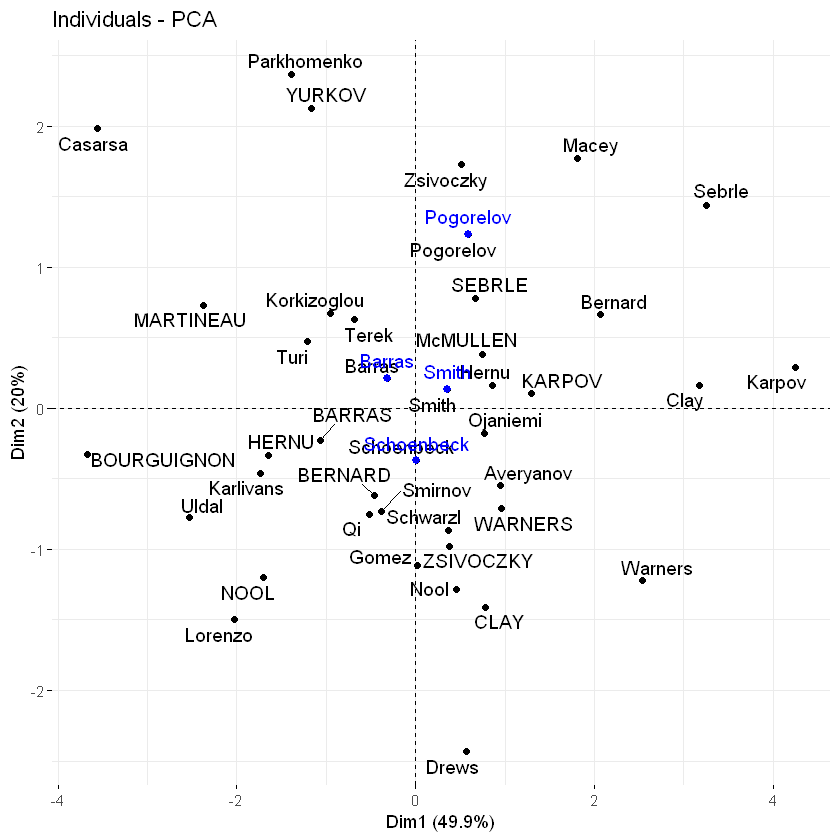

In [76]:
# Graph of individuals including the supplementary individuals
# Plot of active individuals
p <- fviz_pca_ind(res.pca, repel = TRUE)
# Add supplementary individuals
fviz_add(p, ind.sup.coord, color ="blue")

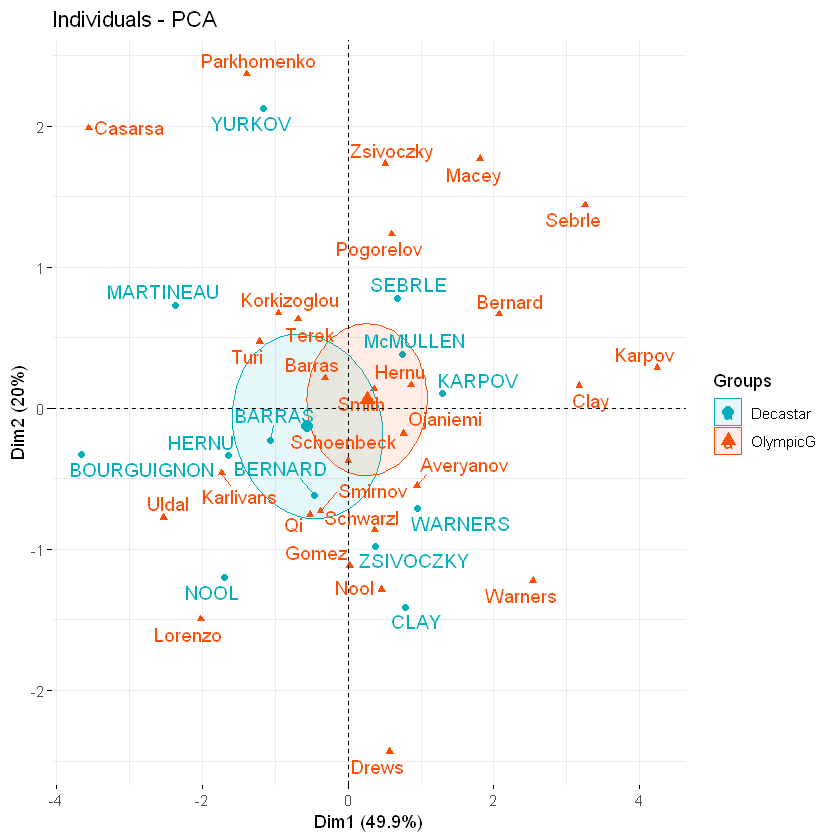

In [77]:
groups <- as.factor(pca_df$Competition)

fviz_pca_ind(res.pca,
             col.ind = groups, # color by groups
             palette = c("#00AFBB",  "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE
)